Name: Harshvardhan Pandey  
Roll No: 2022112006

In [44]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

### Q1

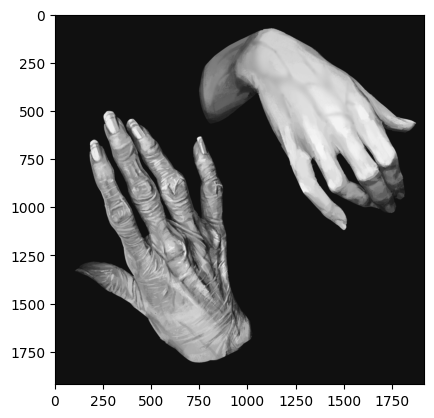

In [45]:
hand = cv2.imread("src/hands.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(hand, cmap="gray")

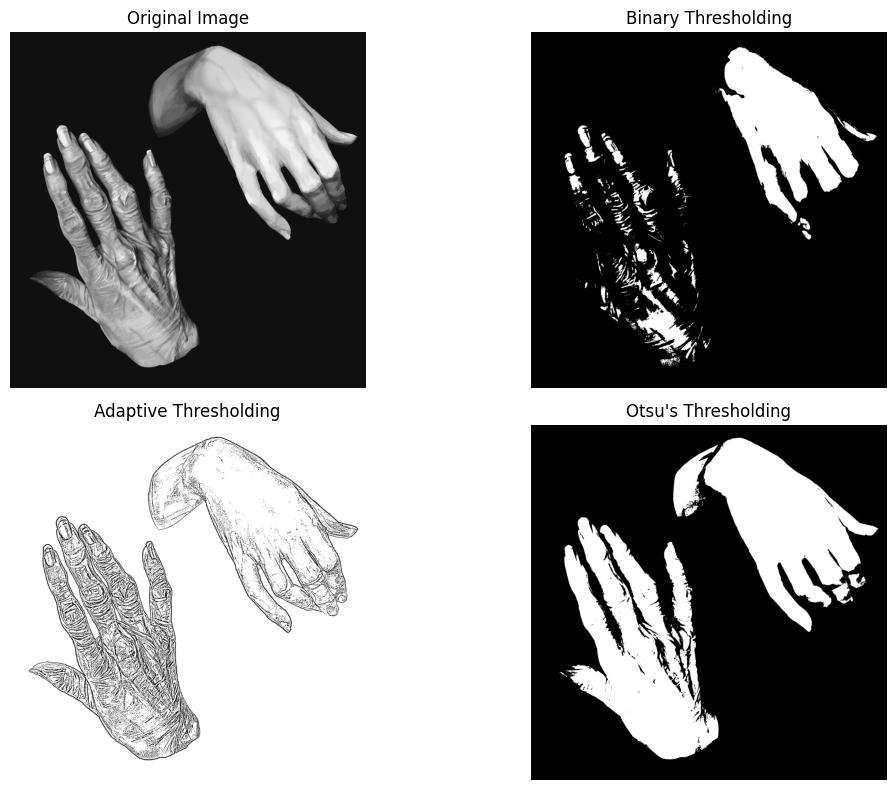

In [46]:
_, binary_thresh = cv2.threshold(hand, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh = cv2.adaptiveThreshold(hand, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

_, otsu_thresh = cv2.threshold(hand, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original Image', 'Binary Thresholding', 'Adaptive Thresholding', "Otsu's Thresholding"]
images = [hand, binary_thresh, adaptive_thresh, otsu_thresh]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Otsu Thresholding works well when the image has a clean bimodal distribution, but adaptive distribution would work well in cases of uneven distribution.

### Q2

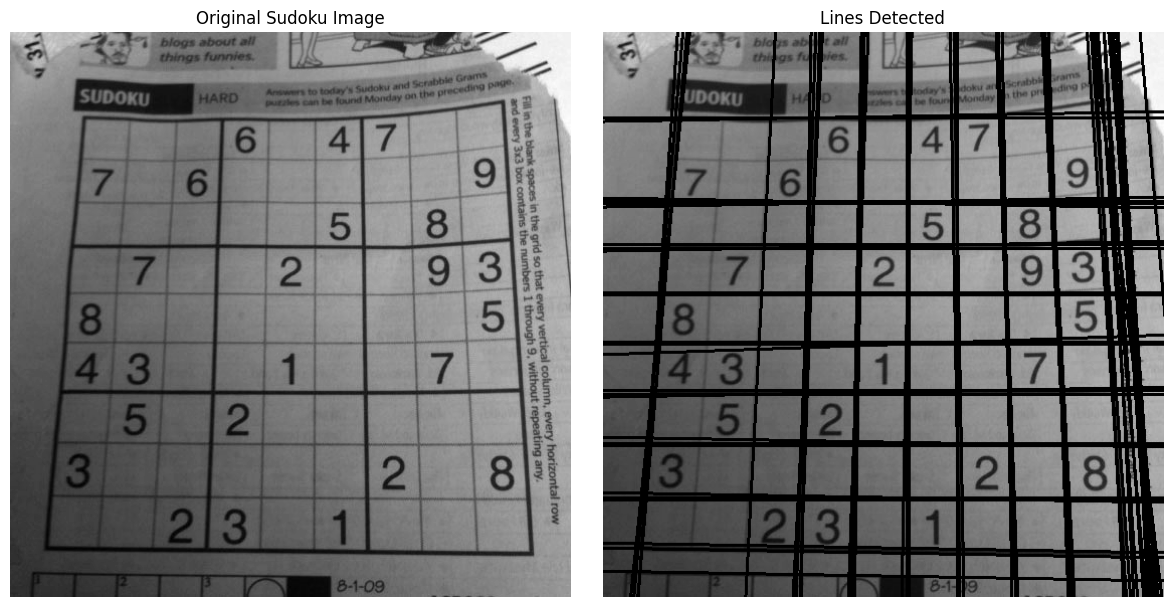

In [47]:
def detect_lines(image: np.ndarray) -> np.ndarray:

    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Draw the lines on the original image
    output_image = image.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)


    return output_image

sudoku = cv2.imread("src/sudoku.png", cv2.IMREAD_GRAYSCALE)
lines_detected = detect_lines(sudoku)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sudoku, cmap="gray")
plt.title("Original Sudoku Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lines_detected, cmap="gray")
plt.title("Lines Detected")
plt.axis("off")

plt.tight_layout()
plt.show()

### Q3

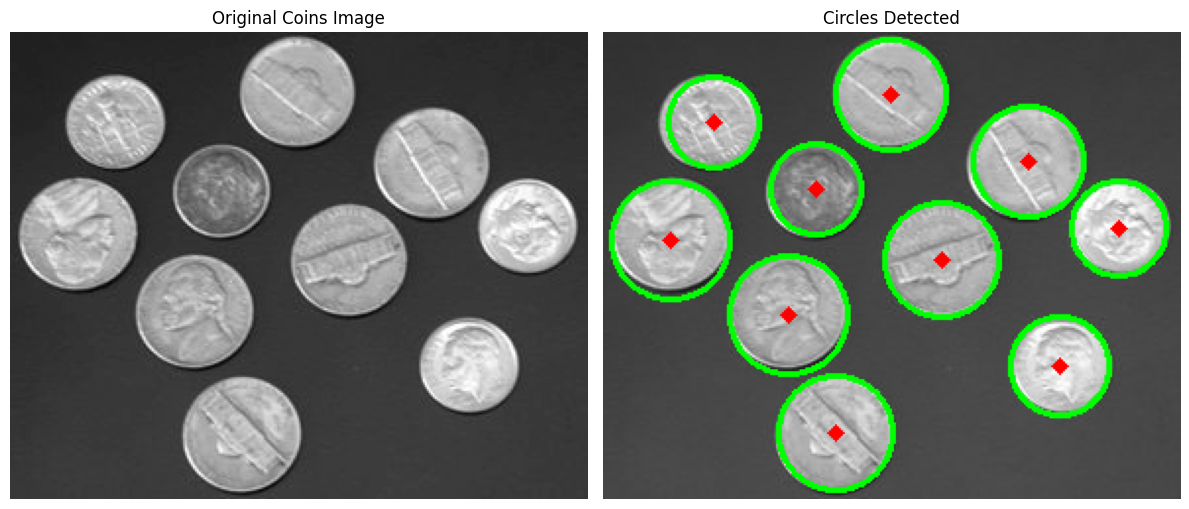

In [48]:
def detect_circles(image, dp=0.15, min_dist=40, param1=50, param2=30, min_radius=0, max_radius=50):
    """
    Detect circles in an image using the Hough Circle Transform.

    Args:
        image (np.ndarray): Grayscale image.
        dp (float): Inverse ratio of the accumulator resolution to the image resolution.
        min_dist (int): Minimum distance between detected circle centers.
        param1 (int): First parameter for the Canny edge detector (higher threshold).
        param2 (int): Threshold for center detection in Hough Transform.
        min_radius (int): Minimum circle radius.
        max_radius (int): Maximum circle radius.

    Returns:
        output_image (np.ndarray): Original image with detected circles highlighted.
        circles (np.ndarray): Detected circles, each represented as (x, y, radius).
    """

    blurred = cv2.GaussianBlur(image, (9, 9), 2)
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp,
        min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)
            cv2.circle(output_image, center, 2, (0, 0, 255), 3)

    return output_image

coins = cv2.imread("src/coins.jpg", cv2.IMREAD_GRAYSCALE)
circles_detected = detect_circles(coins)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(coins, cmap="gray")
plt.title("Original Coins Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(circles_detected[:, :, ::-1])
plt.title("Circles Detected")
plt.axis("off")

plt.tight_layout()
plt.show()

### Q4

982
812
615
348


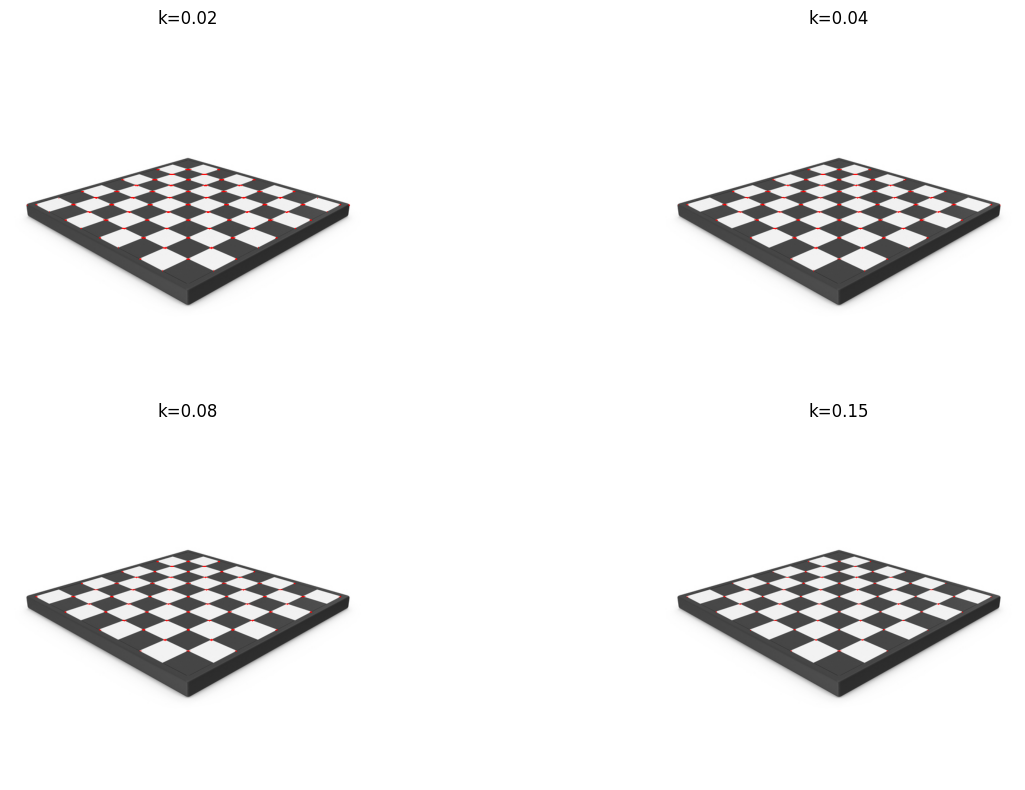

In [49]:
def harris_corner_detection(image, k=0.04, threshold=0.01):
    """
    Detect and mark corners using the Harris Corner Detection method.

    Args:
        image (np.ndarray): Grayscale image.
        k (float): Harris detector free parameter (typically between 0.04 and 0.06).
        threshold (float): Threshold to classify strong corners (proportion of max corner response).

    Returns:
        marked_image (np.ndarray): Image with corners marked.
        corners (np.ndarray): Corner response matrix.
    """
    gray = np.float32(image)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    print(np.sum(corners > threshold * corners.max()))
    corners_normalized = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    marked_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    marked_image[corners > threshold * corners.max()] = [0, 0, 255]  # Mark corners in red

    return marked_image, corners_normalized

chessboard = cv2.imread("src/chessboard.jpg", cv2.IMREAD_GRAYSCALE)

results = {
    "k=0.02": harris_corner_detection(chessboard, k=0.02)[0],
    "k=0.04": harris_corner_detection(chessboard, k=0.04)[0],
    "k=0.08": harris_corner_detection(chessboard, k=0.08)[0],
    "k=0.15": harris_corner_detection(chessboard, k=0.15)[0],
}

# Plot the results for comparison
plt.figure(figsize=(16, 8))
for i, (title, marked_image) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

A lower $k$ parameter makes the corner detection more sensitive